# Bibliotecas python

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
sns.set(style="whitegrid", palette="pastel")


# Carregar a base de dados do arquivo CSV

In [67]:
url = "https://github.com/valdineyatilio/ProjetoAplicado-III/raw/refs/heads/main/Aula-02/BaseDeDados-AmazonProductReviews.csv"

In [68]:
dados_Amazon = pd.read_csv(url, encoding='latin1', sep=';')

# Vizualição das primeiras linhas do data frame

In [69]:
print(dados_Amazon.head())

   Id   ProductId          UserId                    ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                     Delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                         Dll Pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres Natalia Corres   
3   4  B000UA0QIQ  A395BORC6FGVXV                           Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham M. Wassir   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                   1.0                     1.0    5.0  1303862400   
1                   0.0                     0.0    1.0  1346976000   
2                   1.0                     1.0    4.0  1219017600   
3                   3.0                     3.0    2.0  1307923200   
4                   0.0                     0.0    5.0  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as 

# Verificar os nomes das colunas

In [70]:
print(dados_Amazon.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


# Verificação de Tipos de Dados

In [71]:
for coluna in dados_Amazon.columns:
    if dados_Amazon[coluna].dtype == 'object':
        dados_Amazon[coluna] = dados_Amazon[coluna].astype('category')

# Verificação gerais sobre o dataset

In [72]:
print(dados_Amazon.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5253 entries, 0 to 5252
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Id                      5253 non-null   int64   
 1   ProductId               5253 non-null   category
 2   UserId                  5253 non-null   category
 3   ProfileName             5253 non-null   category
 4   HelpfulnessNumerator    5220 non-null   float64 
 5   HelpfulnessDenominator  5242 non-null   float64 
 6   Score                   5251 non-null   float64 
 7   Time                    5253 non-null   int64   
 8   Summary                 5242 non-null   category
 9   Text                    5226 non-null   category
dtypes: category(5), float64(3), int64(2)
memory usage: 949.2 KB
None


# Resumo estatístico descritivo

In [73]:
print(dados_Amazon.describe(include='all'))


                 Id   ProductId          UserId ProfileName  \
count   5253.000000        5253            5253        5253   
unique          NaN         782            5047        4894   
top             NaN  B005K4Q1VI  A3NHUQ33CFH3VM         Dan   
freq            NaN         324               5           7   
mean    2628.035599         NaN             NaN         NaN   
std     1517.133964         NaN             NaN         NaN   
min        1.000000         NaN             NaN         NaN   
25%     1315.000000         NaN             NaN         NaN   
50%     2628.000000         NaN             NaN         NaN   
75%     3941.000000         NaN             NaN         NaN   
max     5255.000000         NaN             NaN         NaN   

        HelpfulnessNumerator  HelpfulnessDenominator        Score  \
count            5220.000000             5242.000000  5251.000000   
unique                   NaN                     NaN          NaN   
top                      NaN        

# Valores nulos em cada coluna 

In [74]:
print(dados_Amazon.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName                0
HelpfulnessNumerator      33
HelpfulnessDenominator    11
Score                      2
Time                       0
Summary                   11
Text                      27
dtype: int64


# Adicionar coluna 'Year' extraindo do tempo (convertendo 'Time' para datetime)

In [75]:
dados_Amazon['Year'] = pd.to_datetime(dados_Amazon['Time'], unit='s').dt.year

# Visualizações gráficas

# Gráfico 1: Distribuição dos Scores

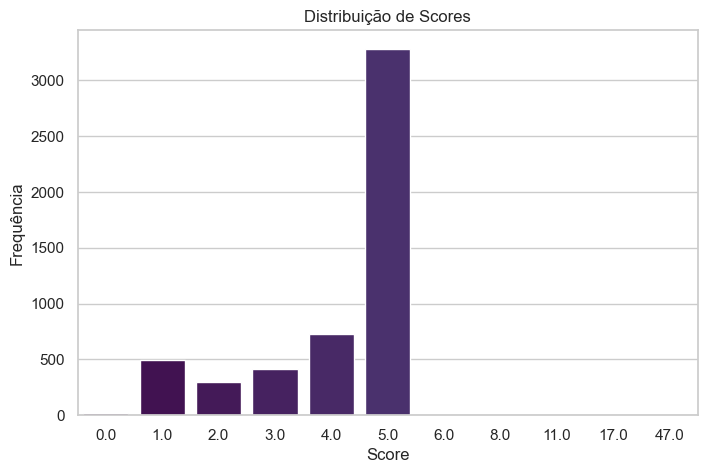

In [76]:
plt.figure(figsize=(8, 5))
sns.countplot(data=dados_Amazon, x='Score', hue='Score', palette='viridis', legend=False)
plt.title("Distribuição de Scores")
plt.xlabel("Score")
plt.ylabel("Frequência")
plt.show()



# Gráfico 2: Helpfulness Numerator vs Helpfulness Denominator


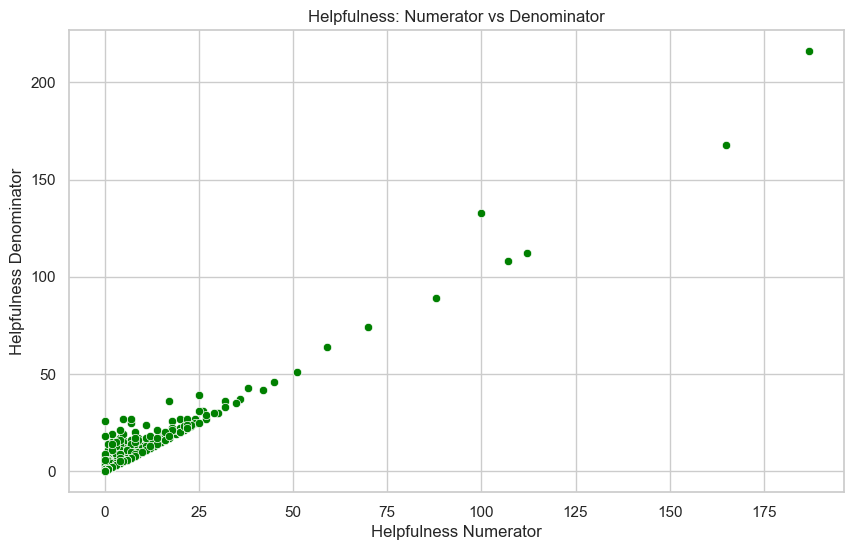

In [77]:
if 'HelpfulnessNumerator' in dados_Amazon.columns and 'HelpfulnessDenominator' in dados_Amazon.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='HelpfulnessNumerator', y='HelpfulnessDenominator', data=dados_Amazon, color='green')
    plt.title("Helpfulness: Numerator vs Denominator")
    plt.xlabel("Helpfulness Numerator")
    plt.ylabel("Helpfulness Denominator")
    plt.show()


# Gráfico 3: Distribuição de Avaliações por Tempo (ano)


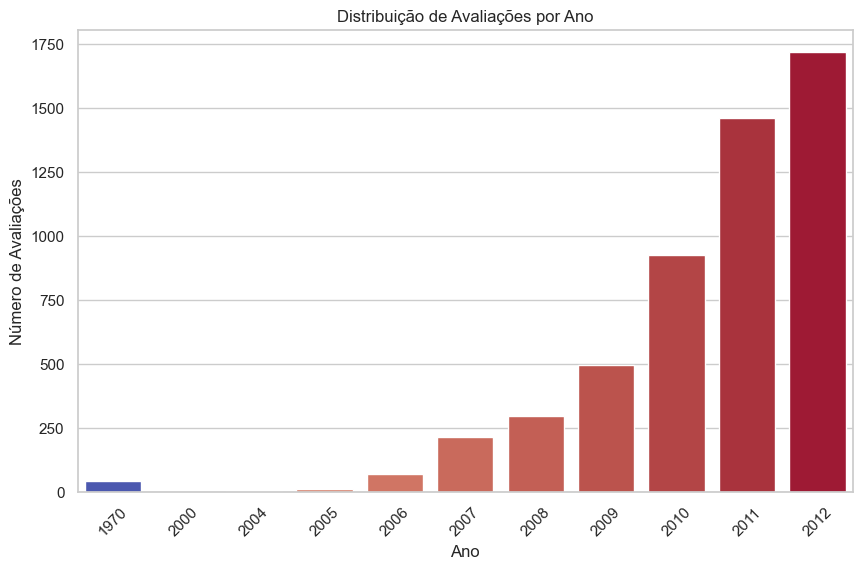

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_Amazon, x='Year', hue='Year', palette='coolwarm', legend=False)
plt.title("Distribuição de Avaliações por Ano")
plt.xlabel("Ano")
plt.ylabel("Número de Avaliações")
plt.xticks(rotation=45)
plt.show()


# Mapa de calor para valores nulos

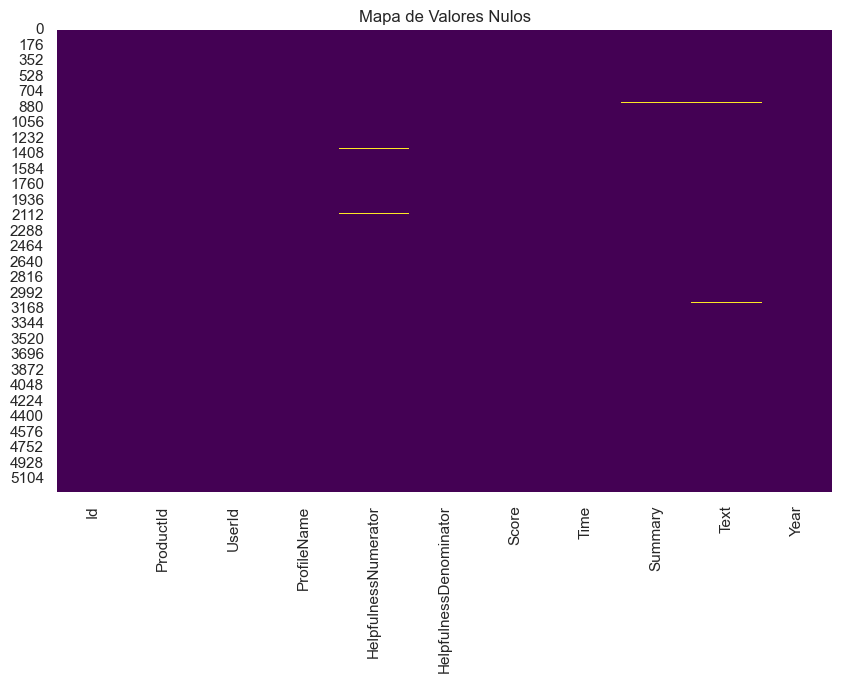

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(dados_Amazon.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de Valores Nulos")
plt.show()

# Gráfico de correlação

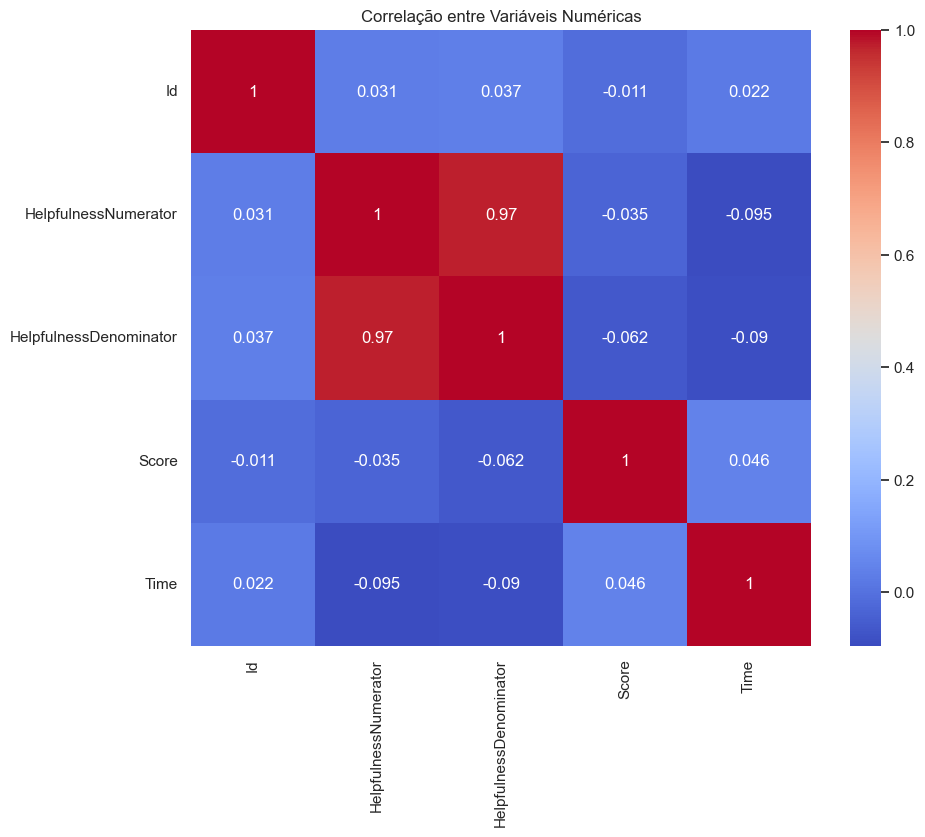

In [80]:
# Selecionar apenas colunas numéricas
dados_numericos = dados_Amazon.select_dtypes(include=['float64', 'int64'])

# Verificar se há colunas numéricas suficientes para gerar a matriz de correlação
if dados_numericos.shape[1] > 1:
    # Gerar a matriz de correlação
    plt.figure(figsize=(10, 8))
    sns.heatmap(dados_numericos.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlação entre Variáveis Numéricas")
    plt.show()
else:
    print("Não há colunas numéricas suficientes para calcular a correlação.")
